# 糖尿病预测实验复现

### 数据存放在复现.ipnyb同级目录下

## 复现如下

### 导入相关包并导入数据集，同时打印前五行以验证是否

In [1]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

In [2]:
#引入相关支持的包
import pandas as pd
import numpy as np
df= pd.read_csv(r'pima-indians-diabetes.data',sep=',')
print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


### 查看数据尺寸、打印信息，判断特征的类型（名称性、数值型），目标变量分布以及查看是否均衡

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pregnancies              768 non-null    int64  
 1   Glucose                  768 non-null    int64  
 2   BloodPressure            768 non-null    int64  
 3   SkinThickness            768 non-null    int64  
 4   Insulin                  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   DiabetesPedigreeFuction  768 non-null    float64
 7   Age                      768 non-null    int64  
 8   Outcome                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 下面的Outcome表明两种样本差距过大，如果直接使用，会很影响模型的效果，可能需要考虑 过采样 ：增加少数类样本（如SMOTE算法）；欠采样 ：减少多数类样本；调整类别权重 ：在模型训练时给少数类更高的权重。

In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 对df特征进行相关性可视化 这里用的是spearman相关系数，而不是pearson相关系数（衡量两个变量之间的线性相关性）。

<AxesSubplot:>

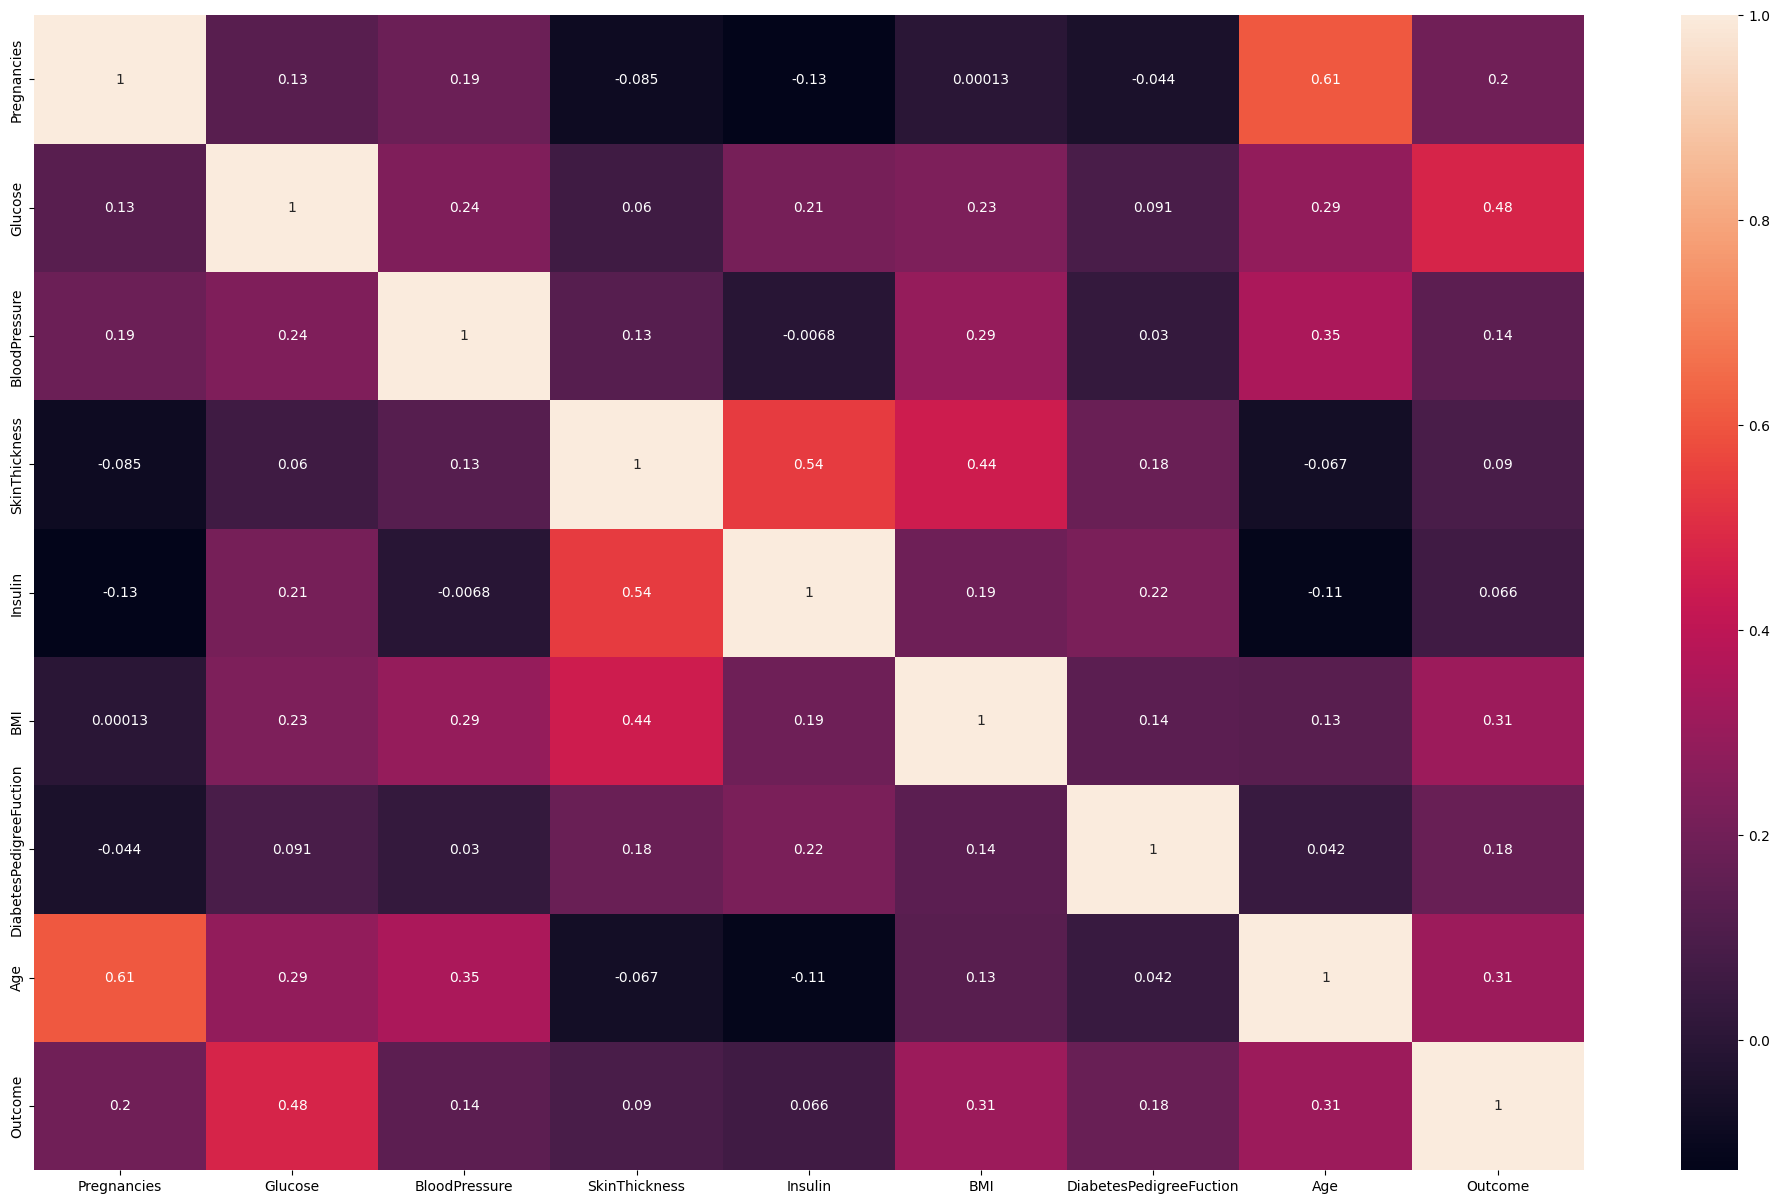

In [5]:
#导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#计算特征相关性并可视化
corr_matrix = df.corr(method='spearman') # pearson 皮尔逊, 是spearman 斯皮尔曼 
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True)

### 绘制每个特征的分布

In [6]:
import math

def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid') 
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # 调整图表位置和大小间距
    rows = math.ceil(float(dataset.shape[1]) / cols)# ceil方法向上取整
    for i, column in enumerate(dataset.columns): #返回索引和列名
        ax = fig.add_subplot(rows, cols, i + 1)# 创建子图，类似于subplot方法
        ax.set_title(column)	# 设置轴的标题
        if dataset.dtypes[column] == np.object: # 通过列的类型来区分所选取的图像类型
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25) 
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)



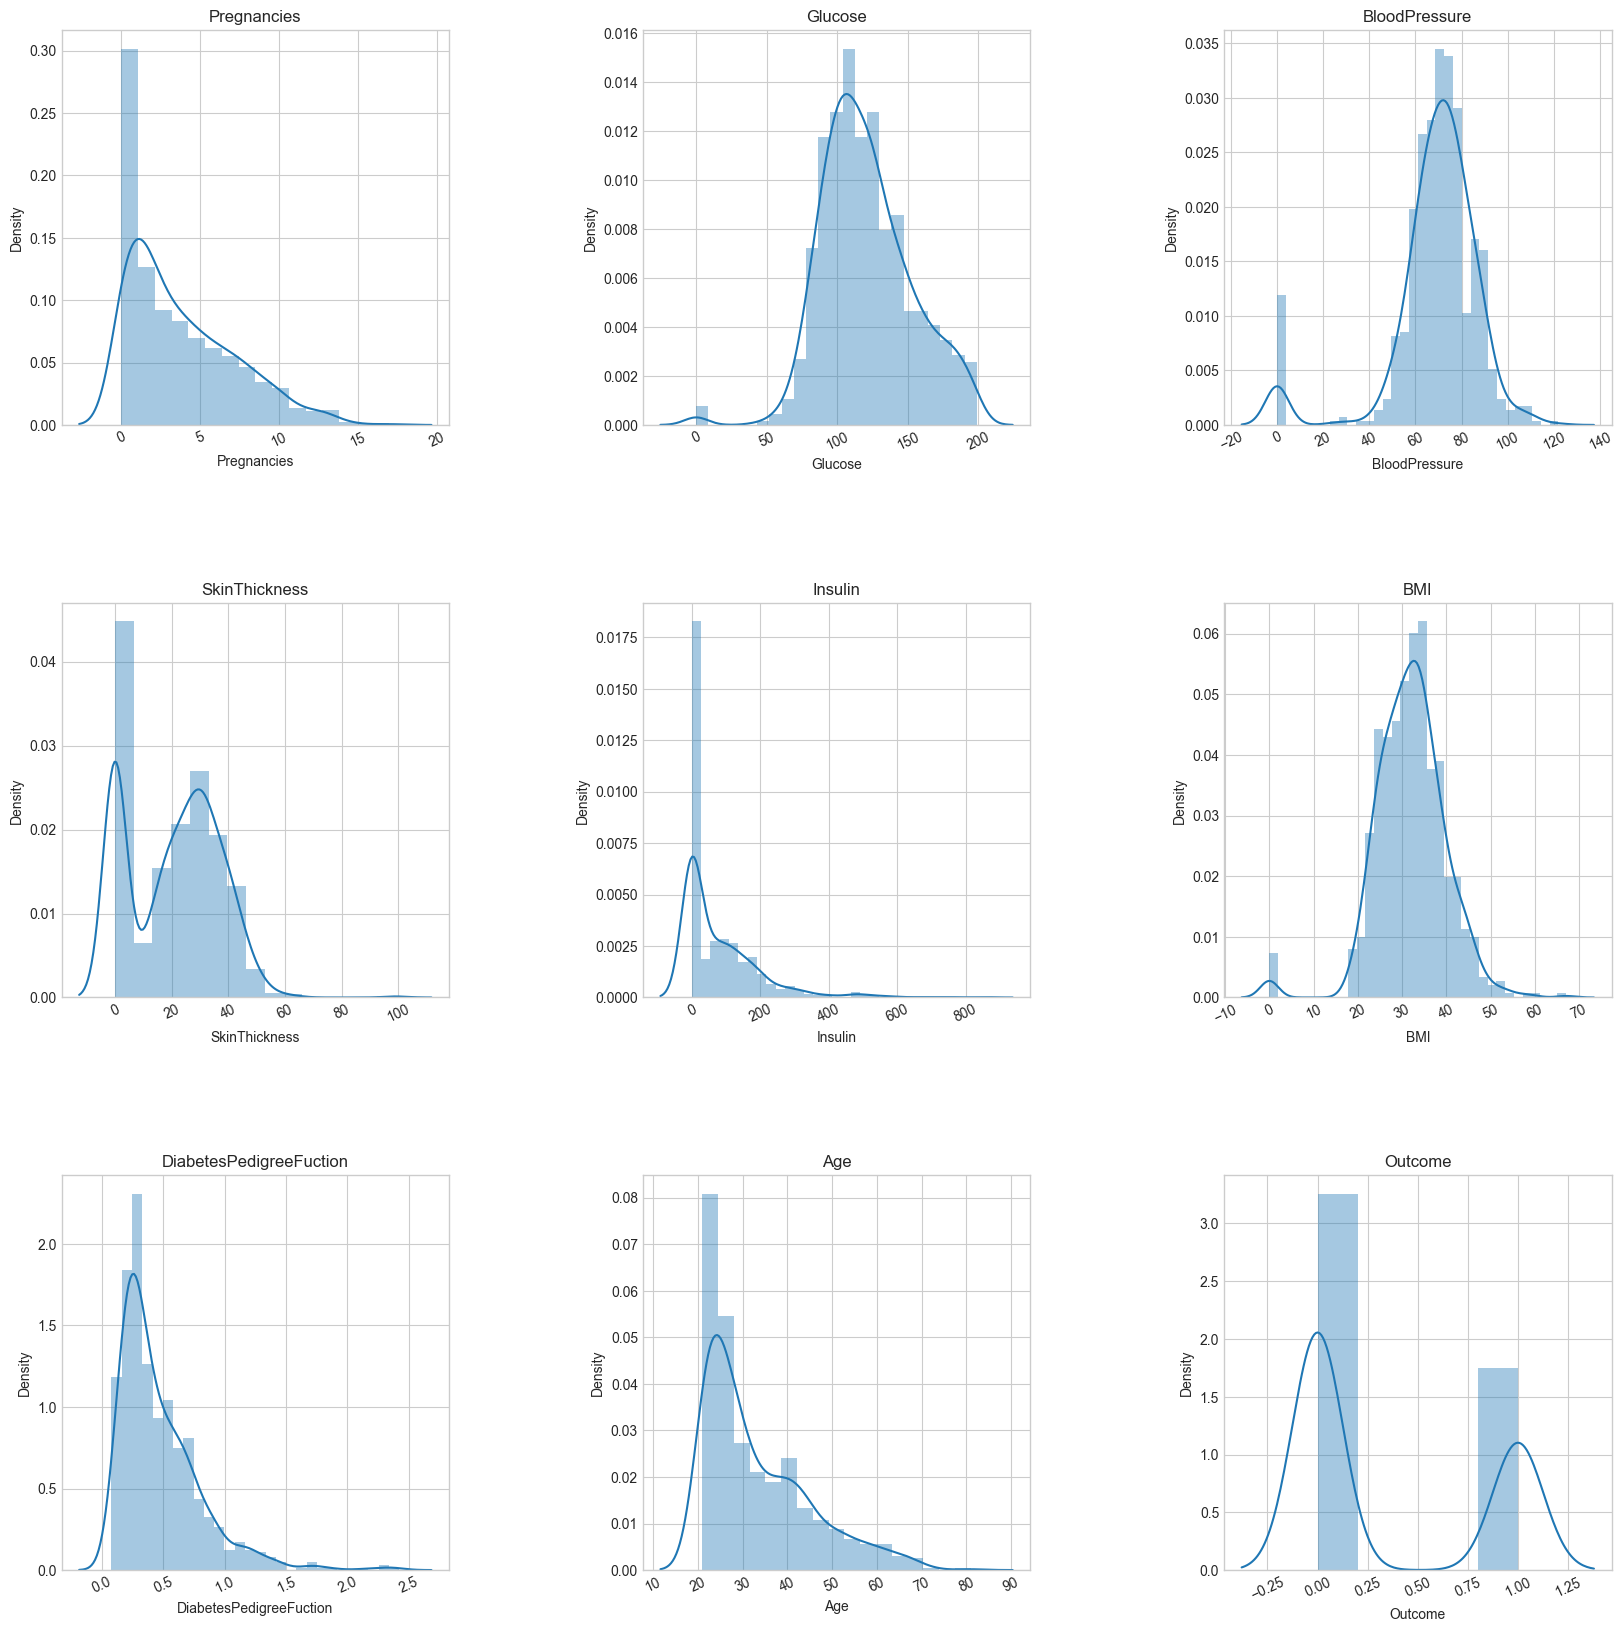

In [7]:
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [8]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in df.columns if col!='Outcome']
y_col = 'Outcome'
X=df[x_cols].values    #dataframe 转化为 ndarray,才能进入下面的标准化和3D制图
y=df[y_col].values


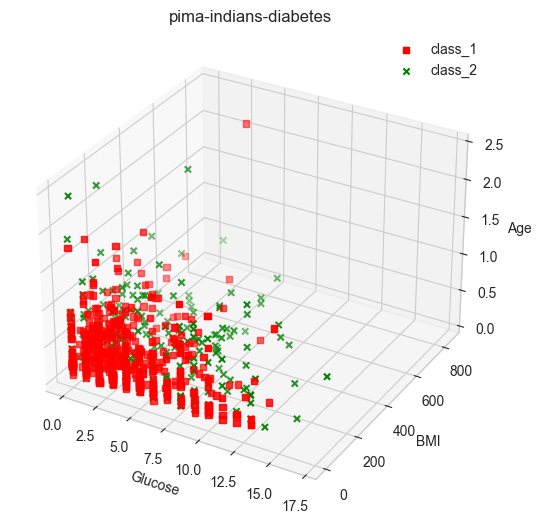

In [9]:
### 绘制3D散点图-3个维度的数据点的散点分布
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
for c,m,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X[y==i ,0], X[y==i, 4], X[y==i, 6],c=c,marker=m, label=l)
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[5])
ax.set_zlabel(df.columns[7])
ax.set_title("pima-indians-diabetes")
plt.legend()
plt.show()


### 对输入特征进行降维并进行打印以及可视化

In [10]:
### 对输入特征进行降维处理
from sklearn.decomposition import PCA
from sklearn import preprocessing                    #调用标准化模块
X_std = preprocessing.scale(X)                        #降维训练前需要对数据标准化
pca = PCA(n_components=0.95, random_state=0.99)       # 保留99%信息的主成分个主成分
X_pca =pca.fit(X_std).transform(X_std)

In [11]:
print('the Top 95% variance_ratio:',pca.explained_variance_ratio_)

the Top 95% variance_ratio: [0.26185321 0.21640525 0.12862254 0.10946977 0.09528539 0.08533321
 0.05247248 0.05055815]


In [12]:
X_pca.shape

(768, 8)

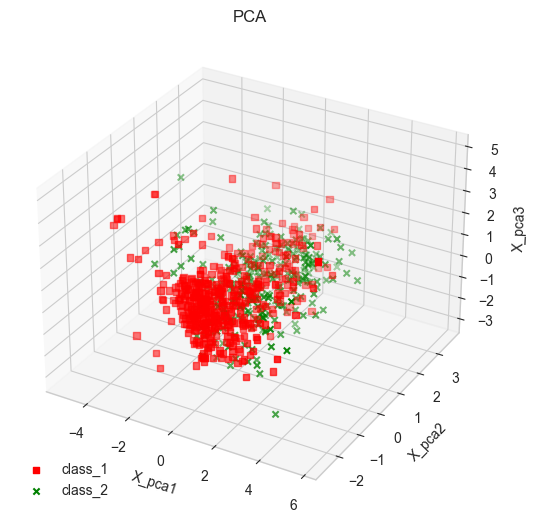

In [13]:
### 输出降维后的前3个主成分的分布图
ax = Axes3D(plt.figure())
for  c, m ,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X_pca[y==i, 0], X_pca[y==i,1],X_pca[y==i,2], c=c, label=l, marker=m) # 散点图
ax.set_xlabel('X_pca1')
ax.set_ylabel('X_pca2')
ax.set_zlabel('X_pca3')
ax.set_title("PCA")
plt.legend(loc='lower left')
plt.show()

### 划分了测试集和训练集，下面的分层抽样很好的解决了上面样本数量差异大所导致的效果不好的问题。

In [14]:
from collections import Counter
from sklearn.model_selection import train_test_split
### 选择不过滤和降维的全部数据进行训练
X_train, X_test, y_train, y_test = train_test_split(
                    df[x_cols],
                    df[y_col],
                    test_size=0.1,                #分割比例
                    random_state=42,              #随机数种子
                    shuffle=True,                 #是否打乱顺序 
                   stratify=df[y_col]                #指定以Target的比例做分层抽样
)               
print('Distribution of y_train {}'.format(Counter(y_train)))
print('Distribution of y_test {}'.format(Counter(y_test)))

Distribution of y_train Counter({0: 450, 1: 241})
Distribution of y_test Counter({0: 50, 1: 27})


### 选择逻辑回归算法对拆分后的数据进行建模训练和预测

In [15]:
#引入逻辑斯谛回归和交叉验证的库
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#引入评价指标的库
from sklearn.metrics import f1_score

In [16]:
#声明逻辑斯谛回归模型，solver使用liblinear，最大迭代次数为500
lr_model = LogisticRegression()
#对原始模型做交叉验证
cv_score = cross_val_score(lr_model, X_train, y_train, scoring='f1', cv=5) 
print('cross validation score of raw model {}'.format(cv_score))

cross validation score of raw model [0.52380952 0.64367816 0.66666667 0.68181818 0.56097561]


In [17]:
#查看下当前模型
lr_model 

LogisticRegression()

In [18]:
c_range=[0.001,0.01,0.1,1.0]
solvers = ['liblinear','lbfgs','newton-cg','sag']
max_iters=[80,100,150,200,300]
tuned_parameters= dict(solver=solvers, C=c_range,max_iter=max_iters)

In [19]:
#网格搜素
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(lr_model, tuned_parameters, cv=5, scoring='f1')
grid.fit(X_train,y_train)
print('best score for model {}'.format(grid.best_score_))
print('best parameters for model {}'.format(grid.best_params_))
print('best parameters for model {}'.format(grid.best_estimator_))


best score for model 0.6244254799841868
best parameters for model {'C': 1.0, 'max_iter': 80, 'solver': 'newton-cg'}
best parameters for model LogisticRegression(max_iter=80, solver='newton-cg')


### 在训练集上进行预测

In [20]:
#### 根据选择后的参数，最后预测
lr_model_final = LogisticRegression(C=1.0, max_iter=80, solver='newton-cg')
lr_model_final.fit(X_train,y_train)
y_train_pred = lr_model_final.predict(X_train)
print('final score of model version2: {}'.format(f1_score(y_train,y_train_pred)))

final score of model version2: 0.644859813084112


In [22]:
## 上面已经复现完成了，下面是进一步的分析

In [ ]:
### 在测试集上评估

In [21]:
y_test_pred = lr_model_final.predict(X_test)
print('Test F1 score: {}'.format(f1_score(y_test, y_test_pred)))

Test F1 score: 0.6545454545454545


In [ ]:
### 绘制混淆矩阵

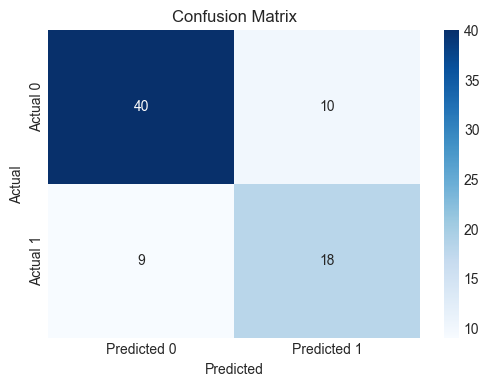

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)

# 绘制热力图
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 计算分类报告，对精确率，召回率的指标详细分析

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        50
           1       0.64      0.67      0.65        27

    accuracy                           0.75        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.76      0.75      0.75        77



### 绘制ROC曲线，计算auc值，auc越接近1，模型性能越好

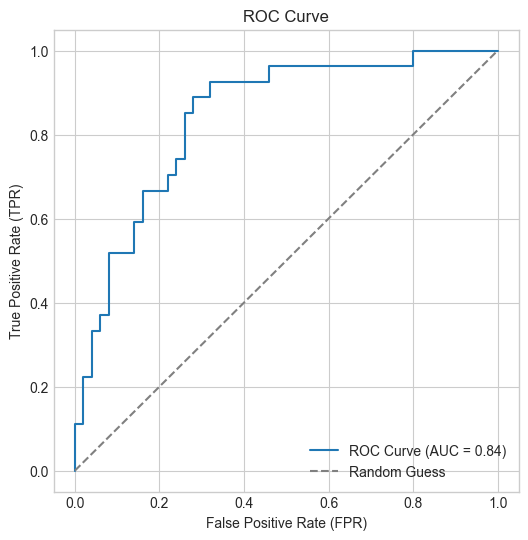

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# 计算预测概率
y_test_prob = lr_model_final.predict_proba(X_test)[:, 1]

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# 计算AUC
auc_score = roc_auc_score(y_test, y_test_prob)

# 绘制ROC曲线
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 绘制精确率-召回率曲线，其实从最后的图像来看，在这种情况下，该模型性能一般

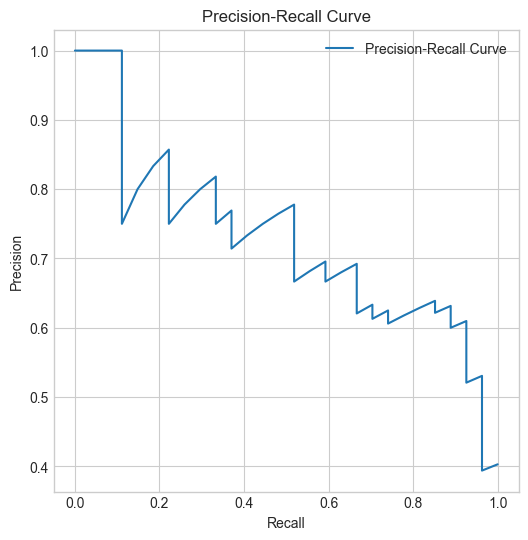

In [26]:
from sklearn.metrics import precision_recall_curve

# 计算精确率-召回率曲线
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

# 绘制曲线
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### 经过上面的分析，能够得出以下几个结论
优点 ：
- AUC 值（0.84）表明模型在区分正负类样本方面表现较好。
- 在类别 0（多数类）上的精确率、召回率和 F1 分数较高，说明模型对多数类的识别能力较强。
缺点 ：
- 在类别 1（少数类）上的精确率、召回率和 F1 分数较低，说明模型对少数类的识别能力不足。
- 精确率-召回率曲线显示模型性能一般，尤其是在高召回率下精确率下降明显。
- 错误率较高（24.7%），表明模型在部分样本上预测不够准确。

### 改进方向（详见 改进.ipynb）
- 处理类别不平衡 ：使用过采样（如 SMOTE）或欠采样方法平衡类别分布；在模型训练时调整类别权重（如class_weight='balanced'）。
- 优化模型 ：尝试其他分类算法（如随机森林、XGBoost、支持向量机等）；使用网格搜索或随机搜索优化超参数。